In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_data = pd.read_csv('../Data/Fraud_Data.csv')

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
fraud_data.shape

(151112, 11)

In [5]:
fraud_data.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [6]:
fraud_data = fraud_data.drop_duplicates()
print(fraud_data.shape)

(151112, 11)


In [7]:
fraud_data.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [8]:
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time']) 
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

In [9]:
fraud_data.describe()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336


In [10]:
fraud_data['class'].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

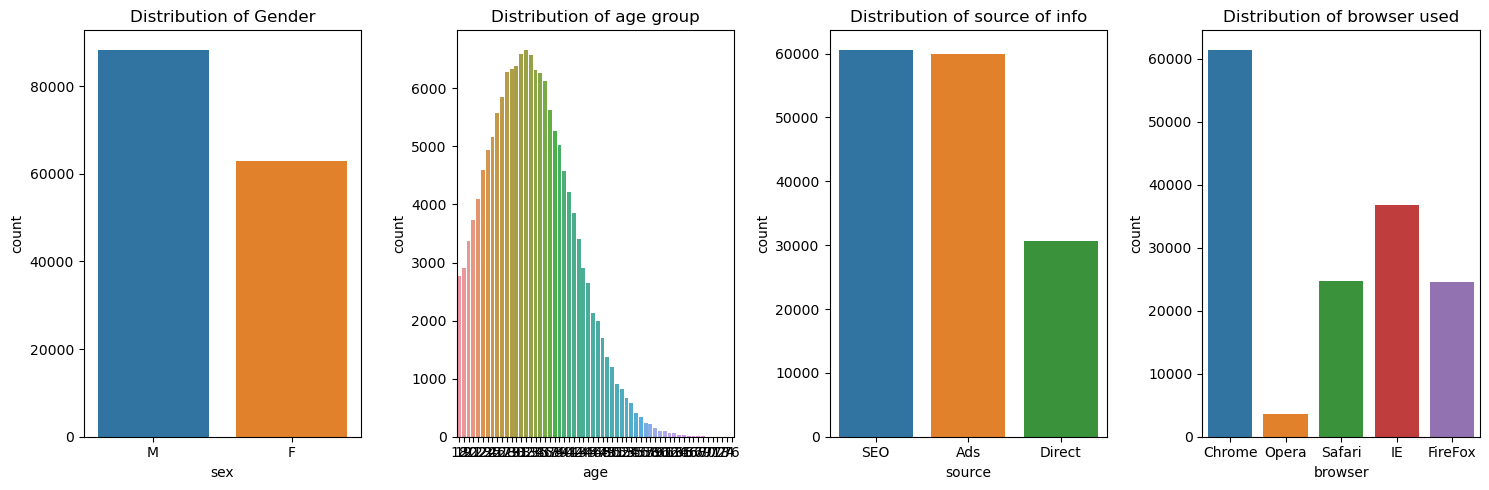

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.countplot(x='sex', data=fraud_data, ax=axes[0])
axes[0].set_title('Distribution of Gender')

sns.countplot(x='age', data=fraud_data, ax=axes[1])
axes[1].set_title('Distribution of age group')

sns.countplot(x='source', data=fraud_data, ax=axes[2])
axes[2].set_title('Distribution of source of info')

sns.countplot(x='browser', data=fraud_data, ax=axes[3])
axes[3].set_title('Distribution of browser used')

plt.tight_layout() 

plt.show()

/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


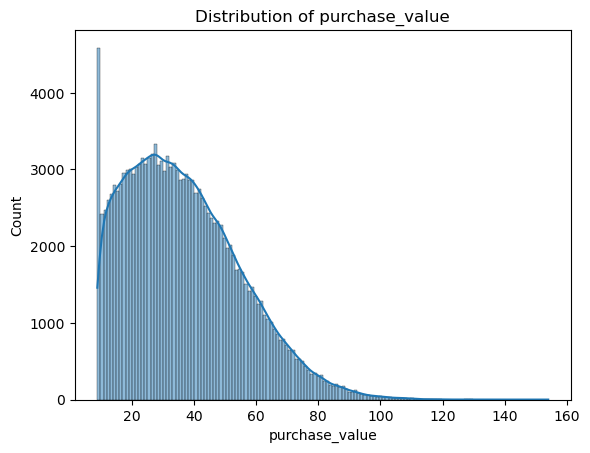

In [12]:
sns.histplot(fraud_data['purchase_value'], kde=True)
plt.title('Distribution of purchase_value')
plt.show()


In [13]:
fraud_data['device_id'].nunique()

137956

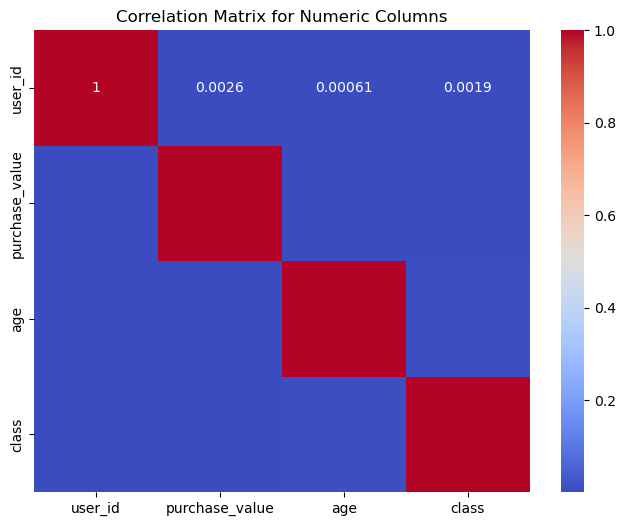

In [14]:
numeric_columns = fraud_data.select_dtypes(include=['int64'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

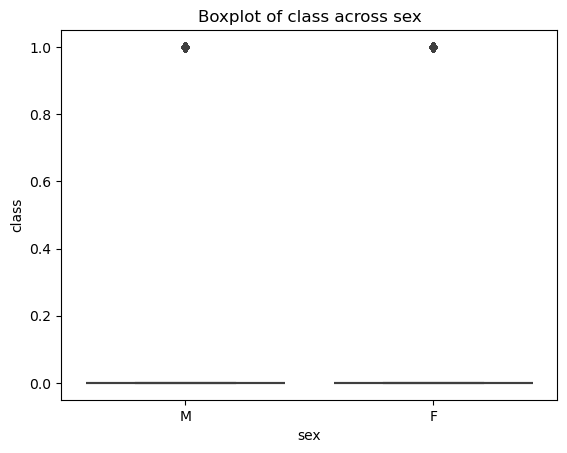

In [15]:
sns.boxplot(x='sex', y='class', data=fraud_data)
plt.title('Boxplot of class across sex')
plt.show()

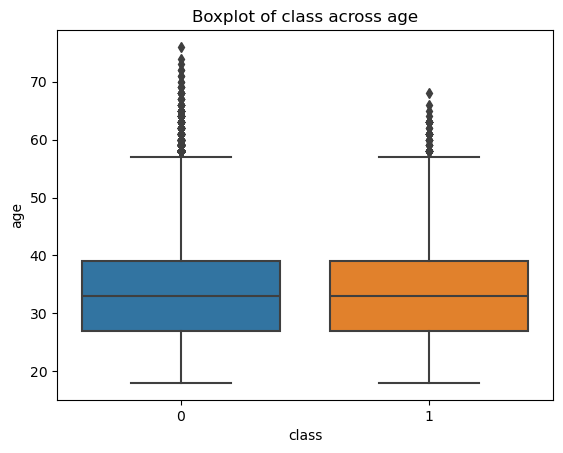

In [16]:
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title('Boxplot of class across age')
plt.show()

In [11]:
fraud_data['ip_address']=fraud_data['ip_address'].astype(int)

In [12]:
ip_data= pd.read_csv('../Data/IpAddress_to_Country.csv')

In [13]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [14]:
fraud_data = pd.concat([fraud_data, ip_data], axis=1)

In [15]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,16777216.0,16777471.0,Australia
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,16777472.0,16777727.0,China
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,16777728.0,16778239.0,China
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,16778240.0,16779263.0,Australia
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,16779264.0,16781311.0,China


In [16]:
fraud_data['lower_bound_ip_address'] = np.where(fraud_data['lower_bound_ip_address'].isna(), fraud_data['ip_address'], fraud_data['lower_bound_ip_address'])
fraud_data['lower_bound_ip_address'] = np.where(np.isinf(fraud_data['lower_bound_ip_address']), fraud_data['ip_address'], fraud_data['lower_bound_ip_address'])

fraud_data['upper_bound_ip_address'] = np.where(fraud_data['upper_bound_ip_address'].isna(), fraud_data['ip_address'], fraud_data['upper_bound_ip_address'])
fraud_data['upper_bound_ip_address'] = np.where(np.isinf(fraud_data['upper_bound_ip_address']), fraud_data['ip_address'], fraud_data['upper_bound_ip_address'])

In [17]:
fraud_data['lower_bound_ip_address']=fraud_data['lower_bound_ip_address'].astype(int)
fraud_data['upper_bound_ip_address']=fraud_data['upper_bound_ip_address'].astype(int)

In [18]:
fraud_data['transaction_day'] = fraud_data['purchase_time'].dt.date
fraud_data['transaction_day']=pd.to_datetime(fraud_data['transaction_day'])
fraud_data['transaction_count'] = fraud_data.groupby(['user_id', 'transaction_day']).transform('size')

fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

In [41]:
fraud_data['Signup_time'] = fraud_data['signup_time'].dt.day
fraud_data['Purchase_time'] = fraud_data['purchase_time'].dt.day
fraud_data['transaction_Day'] = fraud_data['transaction_day'].dt.day
fraud_data=fraud_data.drop(['signup_time','purchase_time','transaction_day'], axis = 1)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns= ['source','device_id','browser','sex','country']
for col in categorical_columns:
    fraud_data[col] = label_encoder.fit_transform(fraud_data[col])

In [42]:
fraud_data.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,hour_of_day,day_of_week,Signup_time,Purchase_time,transaction_Day
0,0.055140,0.172414,0.646696,1.0,0.00,1.0,0.362069,0.170603,0,0.003868,0.003868,0.046809,0.0,0.086957,0.833333,24,18,18
1,0.833299,0.048276,0.174535,0.0,0.00,0.0,0.603448,0.081554,0,0.003868,0.003868,0.178723,0.0,0.043478,0.000000,7,8,8
2,0.003393,0.041379,0.951151,1.0,0.75,1.0,0.603448,0.610371,1,0.003868,0.003868,0.178723,0.0,0.782609,0.500000,1,1,1
3,0.375207,0.241379,0.028828,1.0,1.00,1.0,0.396552,0.894219,0,0.003868,0.003868,0.046809,0.0,0.565217,0.000000,28,4,4
4,0.553410,0.206897,0.498402,0.0,1.00,1.0,0.465517,0.096752,0,0.003868,0.003869,0.178723,0.0,0.782609,0.333333,21,9,9


In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#numeric columns to scale
numeric_columns = ['user_id','purchase_value', 'age', 'device_id','source','browser','sex','country','ip_address','transaction_count','lower_bound_ip_address','upper_bound_ip_address','hour_of_day','day_of_week']  
scaler = MinMaxScaler()
fraud_data[numeric_columns] = scaler.fit_transform(fraud_data[numeric_columns])

fraud_data[numeric_columns].head()


,user_id,purchase_value,age,device_id,source,browser,sex,country,ip_address,transaction_count,lower_bound_ip_address,upper_bound_ip_address,hour_of_day,day_of_week
0,0.055140,0.172414,0.362069,0.646696,1.0,0.00,1.0,0.046809,0.170603,0.0,0.003868,0.003868,0.086957,0.833333
1,0.833299,0.048276,0.603448,0.174535,0.0,0.00,0.0,0.178723,0.081554,0.0,0.003868,0.003868,0.043478,0.000000
2,0.003393,0.041379,0.603448,0.951151,1.0,0.75,1.0,0.178723,0.610371,0.0,0.003868,0.003868,0.782609,0.500000
3,0.375207,0.241379,0.396552,0.028828,1.0,1.00,1.0,0.046809,0.894219,0.0,0.003868,0.003868,0.565217,0.000000
4,0.553410,0.206897,0.465517,0.498402,0.0,1.00,1.0,0.178723,0.096752,0.0,0.003868,0.003869,0.782609,0.333333


In [46]:
fraud_data=fraud_data.astype('float64')

In [66]:
credit = pd.read_csv('../Data/creditcard.csv')

In [67]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
credit.dropna()
credit.shape

(284807, 31)

In [70]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [72]:
column = credit.columns
scaler = MinMaxScaler()
credit[column] = scaler.fit_transform(credit[column])

credit[column].head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [43]:
import pickle

data_path = '../Data/fraud_data_processed.pkl'
with open(data_path, 'wb') as file:
    pickle.dump(fraud_data, file)


In [74]:
data_path2 = '../Data/credit_data_processed.pkl'
with open(data_path2, 'wb') as file:
    pickle.dump(credit, file)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model_name = 'Logistic Regression'
model = LogisticRegression(class_weight='balanced')

# First dataset (Dataset 1)
with mlflow.start_run(run_name=f"{model_name}_dataset1"):
    
    # Train on the first dataset
    model.fit(X_train_1, y_train_1)
    y_pred_1 = model.predict(X_test_1)
    
    # Log metrics for Dataset 1
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    f1_1 = f1_score(y_test_1, y_pred_1)
    mlflow.log_metric("accuracy", accuracy_1)
    mlflow.log_metric("f1_score", f1_1)

    # Log the model after training on Dataset 1
    signature_1 = infer_signature(X_train_1, y_pred_1)
    mlflow.sklearn.log_model(
        model, model_name + "_dataset1",
        signature=signature_1,
        input_example=X_train_1.head(5)
    )

    print(f"{model_name} Dataset 1: Accuracy = {accuracy_1}, F1 Score = {f1_1}")

# Second dataset (Dataset 2 - Fine-tuning)
with mlflow.start_run(run_name=f"{model_name}_dataset2"):
    
    # Fine-tune on the second dataset
    model.fit(X_train_2, y_train_2)
    y_pred_2 = model.predict(X_test_2)
    
    # Log metrics for Dataset 2
    accuracy_2 = accuracy_score(y_test_2, y_pred_2)
    f1_2 = f1_score(y_test_2, y_pred_2)
    mlflow.log_metric("accuracy", accuracy_2)
    mlflow.log_metric("f1_score", f1_2)

    # Log the model after fine-tuning on Dataset 2
    signature_2 = infer_signature(X_train_2, y_pred_2)
    mlflow.sklearn.log_model(
        model, model_name + "_dataset2",
        signature=signature_2,
        input_example=X_train_2.head(5)
    )

    print(f"{model_name} Dataset 2: Accuracy = {accuracy_2}, F1 Score = {f1_2}")
